In [1]:
import pandas as pd

# Load CSV file (first 100k rows for speed)
df = pd.read_csv('2019-Nov.csv', nrows=100000)

# Preview columns
print(df.columns)

# Filter necessary columns
df = df[['event_time', 'event_type', 'product_id', 'category_id', 'user_id', 'user_session']]

# Convert time
df['event_time'] = pd.to_datetime(df['event_time'])

# Check missing
print(df.isnull().sum())


Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')
event_time       0
event_type       0
product_id       0
category_id      0
user_id          0
user_session    44
dtype: int64


In [2]:
# Count events by stage
funnel = df['event_type'].value_counts()
print(funnel)


event_type
view                45006
cart                28009
remove_from_cart    20569
purchase             6416
Name: count, dtype: int64


In [3]:
views = df[df['event_type'] == 'view']['user_session'].nunique()
cart = df[df['event_type'] == 'cart']['user_session'].nunique()
purchase = df[df['event_type'] == 'purchase']['user_session'].nunique()

print("View to Cart Dropoff:", round((views - cart)/views * 100, 2), "%")
print("Cart to Purchase Dropoff:", round((cart - purchase)/cart * 100, 2), "%")


View to Cart Dropoff: 77.28 %
Cart to Purchase Dropoff: 82.82 %


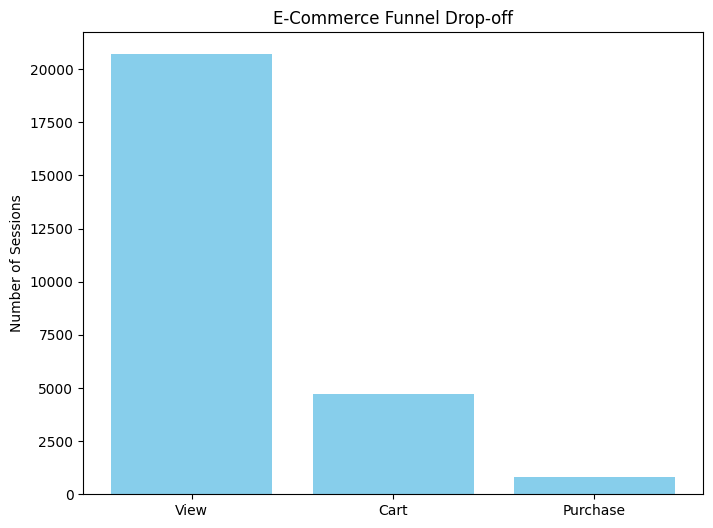

In [4]:
import matplotlib.pyplot as plt

stages = ['View', 'Cart', 'Purchase']
counts = [views, cart, purchase]

plt.figure(figsize=(8,6))
plt.bar(stages, counts, color='skyblue')
plt.title('E-Commerce Funnel Drop-off')
plt.ylabel('Number of Sessions')
plt.show()
